# Homework Set 1

## Problem 1 (20 points):

It is possible to use symbolic code to eliminate round off errors using `sympy`, see the code below. Why don't we avoid these complications this way? Modify the code below and plot the time required each loop as n ranges from 1 to 100,000.

In [178]:
import sympy as sp
import pandas as pd
from sympy import Rational
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

dx_symbolic = Rational (1 ,10)
dx = 0.1

def loop_sympy (n):
    x = 0
    for i in range(n):
        x = x + dx_symbolic
    return x

def loop_float(n):
    x =0
    for i in range(n):
        x = x + dx
    return x

def time_this (f, n):
    import time
    starttime = time.time()
    result = f(n)
    stoptime = time.time()
    #print(" deviation is %16.15g" % ( n * dx_symbolic - result ))
    return stoptime - starttime

# print("loop using float dx:")
# time_float = time_this(loop_float, n)
# print("float loop n=%d takes %6.5f seconds" % (n, time_float))
# print("loop using sympy symbolic dx:")
# time_sympy = time_this (loop_sympy, n)
# print("sympy loop n =% d takes %6.5f seconds" % (n , time_sympy ))
# print("Symbolic loop is a factor %.1f slower." % ( time_sympy / time_float ))

In [183]:
time_list_float=[]
time_list_sympy=[]
for n in range(100000):
    time_list_float.append(time_this(loop_float, n))
    time_list_sympy.append(time_this(loop_sympy, n))

<AxesSubplot:>

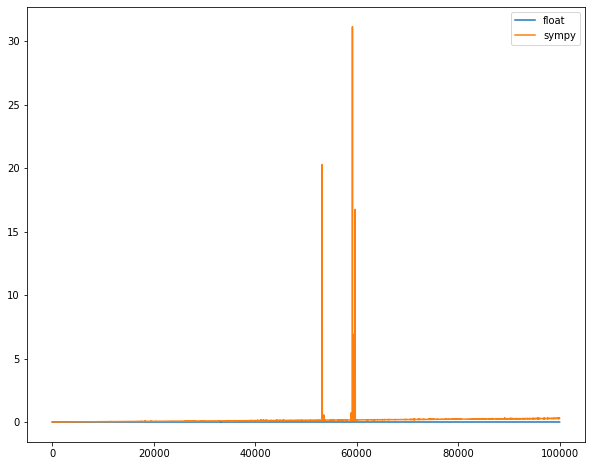

In [185]:
d={'float':time_list_float,'sympy':time_list_sympy}
idx=[i for i in range(1,100001)]
df_time=pd.DataFrame(data=d,index=idx)
df_time.plot(figsize=(10,8)
             #,loglog=True#
            )

## Problem 2 (20 points):

For the first term of the conditional variance expression of the CIR process discused in the class:

$$f(\kappa) = \frac{r_0\sigma^2}{\kappa}(e^{-\kappa t} - e^{-2\kappa t})$$

1. compute its condition number, assuming $\kappa$ is the only variable, comment on whether the computation is stable around $\kappa = 0$
2. implement a function to compute the above expression, which is numerically stable around $\kappa = 0$. A typical approach is to switch to an approximation when $\kappa$ is smaller than a threshold $h$. Explain your choice of $h$, is the $h$ different for double or single precision calculation?  

Ans 1:. condition number: $k(f) = \sum_i \left| \frac{x_i}{f}\frac{\partial f}{\partial x_i} \right|$, and here is only one variable $\kappa $ here. 

Without the constant, the conditional number $k= |\frac{\left(2 k t+1) e^{-2 k t}-(k t+1) e^{-k t}\right.}{e^{-k t} -e^{- 2 k t}}|$,  its unstable near $\kappa=0$ since it both include substraction at the same amount in numerator and denominator, which will cause catastrophic cancellation in calculation.

Ans 2: use taylor expansion to help solve this question. $$e^{-t\kappa}=e^{0}-e^{0}{t\kappa}+\frac{e^0}{2} \kappa^2t^2-\frac{e^0}{6}{\zeta}^3t^3$$ where $\zeta$ is a number between 0 and $\kappa$.

since $e^0=1$, we should focus on and apply taylor series to $\frac{1-e^{-t\kappa}}{\kappa}$,  $$\frac{1-e^{-t\kappa}}{\kappa}=t-\frac{1}{2}{t^2 \kappa}+\frac{1}{6}\frac{\zeta^3 t^3}{\kappa}$$

so  $$r_0\sigma^2(t-\frac{1}{2}{t^2 \kappa}+\frac{1}{6}\frac{\zeta^3 t^3}{\kappa})$$ will be a good approximation for our function.


Regarding our error term, our h should be a function in this form:$$h = \sqrt{\frac{6e}{t^3}\}\$$

For double and single precision calculation, we can choose t=1:

In [228]:
prec_single = 2**(-24)
prec_double = 2**(-53)
h_single=np.sqrt(6*prec_single/(1**3))
h_double=np.sqrt(6*prec_double/(1**3))
print(h_single==h_double)

False


The h for double and single calculation are not the same.

## Problem 3 (20 points):

Implement a matrix product function using hand coded loops in python, please feel free to use numpy array and numpy vector multiplications, but obviously you should not just call numpy matrix multiplication.

Compare the speed of your implementation to the numpy matrix product version, plot the difference in computational time with the size of the matrix.


Hint: 

* %timeit is a useful timing tool in IPython, or you can use time.clock() function
* numpy has two ways of representing matrix, one is array of arrays, another is matrix type. For array types, the matrix product is ```a.dot(b)``` or, currently recommended, ```a@b```. For matrix type, the matrix product is ```a*b```. We recommend you to stick with array type to avoid any potential confusions. The ```a*b``` on array type is element wise multiplication. A common mistake is to use ```a*b``` for matrix product on array type. Please see the following code section as an example.
* numpy.allclose is a useful function to compare floating point calculation results

In [59]:
import numpy as np
import time

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = a + 1
print("a=\n", a)
print("\nb=\n", b)
c = a.dot(b) # matrix product
d = a@b # alternative
e = a*b #elment wise multiplication

print("\nc=a.dot(b)\n", c)
print("\nd=a@b\n", d)
print("\ne=a*b\n", e)

In [52]:
def matrix_multiply(A,B):
    row=A.shape[0]
    col=B.shape[1]
    C=np.zeros((row,col))
    for i in range(row):
        for j in range(col):
            C[i,j]=A[i,:].dot(B[:,j])
    return C,row,col

In [136]:
time_diff=np.zeros(100)
for row in range(100):
    A=np.random.rand(row,row)
    B=np.random.rand(row,row)
    aa=time.time()
    A@B
    multi=time.time()-aa
        
    aaa=time.time()
    matrix_multiply(A,B)
    algo=time.time()-aaa
        
    time_diff[row]=algo-multi

<AxesSubplot:xlabel='size of matrix', ylabel='time difference'>

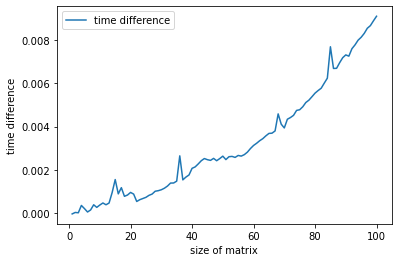

In [175]:
kk=pd.DataFrame(data=time_diff,columns={'time difference'})
kk.index+=1
kk.plot(ylabel='time difference',xlabel='size of matrix')

## Problem 4 (20 points):

From analysis, we know that the derivative of a differential function $f(x)$ is the limit of a difference quotient:

$$ f'(x) =  \lim_{h \rightarrow 0}\frac{f(x+h) - f(x)}{h} $$

This suggest the following approximation of the derivative by difference quotient with small but finite $h>0$:

$$ f'(x) \approx  \frac{f(x+h) - f(x)}{h} $$

for $|h|<<1$.

Analysis tells us that the approximation error should tend to zero as $h$ approaches 0. More precise information is provided by a Taylor expansion for a twice differentiable function"

$$ f(x+h) = f(x) + f'(x)h +\frac{1}{2}f''(\zeta)h^2 $$
for some
$$ \zeta = \zeta(x,h) \in |min(x,x+h),max(x,x+h)| $$

from which we infer

$$ \frac{f(x+h) - f(x)}{h} - f'(x) = \frac{1}{2} f''(\zeta)h^2$$
for some
$$ \zeta = \zeta(x,h) \in |min(x,x+h),max(x,x+h)| $$


Investigate the approximation of the derivative by difference quotients for $f(x)=e^x$, at $x=0$ for different values of $h>0$ and display both in table form and graphically the error verses $\log_{10}(h)$. **Hint:** start with $\log_{10}(h) = -1$ and run to $\log_{10}(h) = -16$.

Ans: approximate the derivative by the quotient for each h, and record the error term.

<AxesSubplot:xlabel='log10(h)', ylabel='error'>

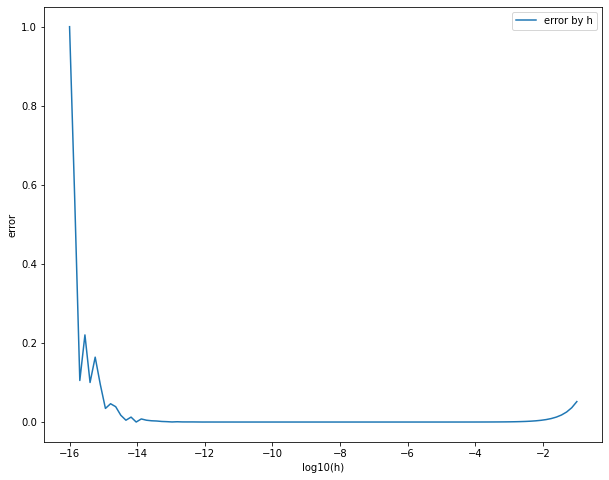

In [119]:
h=np.logspace(-1,-16, 100, endpoint=True)
error_h=(np.exp(h)-1)/h-1
pd_error=pd.DataFrame({'log10(h)':np.log10(h),'error by h':np.abs(error_h)})
pd_error.plot(figsize=(10,8),x='log10(h)',y='error by h',ylabel='error')

In [120]:
pd_error

,log10(h),error by h
0,-1.000000,0.051709
1,-1.151515,0.036118
2,-1.303030,0.025303
3,-1.454545,0.017763
4,-1.606061,0.012488
...,...,...
95,-15.393939,0.100043
96,-15.545455,0.220359
97,-15.696970,0.105121
98,-15.848485,0.566481


## Problem 5 (20 points):

In high school (?), you learned that the quadratic equation has an analytic solution that can be written as either:
$$ x_{1,2} = \frac{-b \pm \sqrt{b^2 - 4 a c}}{2a} $$
or
$$ x'_{1,2} = \frac{-2c}{b \pm \sqrt{b^2 - 4 a c}} $$

Inspection of this second form indicates that subtractive cancellation (with a resulting increase in error) arises when $b^2 >> 4ac$ because the square root term and its preceding term nearly cancel for one of the roots.

a. Write a program that calculates all four solutions for arbitrary values of $a$, $b$, and $c$.


b. Investigate how errors in you computed answers become large as the subtractive cancellation increases and relate this to your machine precision. **Hint:** A good test case uses $a=1$, $b=1$, $c=10^{-n}$, $n = 1, 2, 3, \dots$.


c. Extend your program so it indicates the most precise solutions.

Ans: (a)

In [192]:
def four_sol(a,b,c):
    de=(b**2-4*a*c)**0.5
    x1=(-b+de)/(2*a)
    x2=(-b-de)/(2*a)
    x_1=-(2*c)/(b+de)
    x_2=-(2*c)/(b-de)
    return [x1,x2,x_1,x_2]

(b) plot the absolute difference between two method, and plot them versus differen n. 

In [197]:
a=1
b=1
c=np.arange(1,16,1)

<AxesSubplot:>

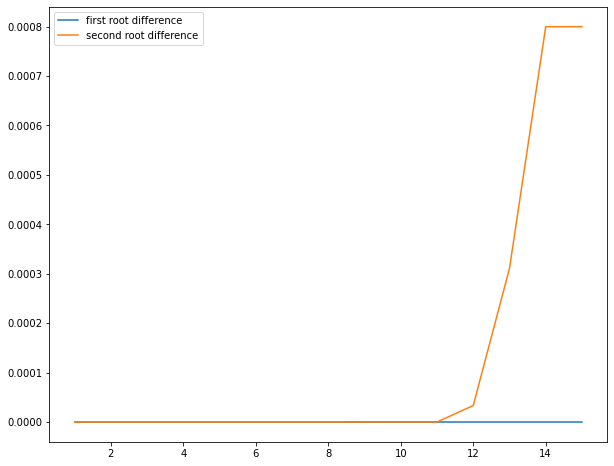

In [215]:
pos,neg=abs(four_sol(1,1,0.1**c)[0]-four_sol(1,1,0.1**c)[2]),abs(four_sol(1,1,0.1**c)[1]-four_sol(1,1,0.1**c)[3])
dataa={'first root difference':pos,'second root difference':neg}
value_diff=pd.DataFrame(data=dataa,index=c)
value_diff.plot(figsize=(10,8))

(c) For the most precise solution, we compute x and x_prime for x1 and x2 separately and put them back to the equation. Calculate f(x) and keep those x1 and x2 let f(x) close to zero, then return them. 

In [224]:
def f(x,a1,b1,c1):
    return a1*x**2+b1*x+c1

def precise_sol(a,b,c):
    de=(b**2-4*a*c)**0.5
    x1=(-b+de)/(2*a)
    x2=(-b-de)/(2*a)
    x_1=-(2*c)/(b+de)
    x_2=-(2*c)/(b-de)
    
    x11=min([x1,x_1], key=lambda x : f(x,a,b,c))
    x22=min([x2,x_2], key=lambda x : f(x,a,b,c))
    return x11,x22
    